# Workshop Attribute and Spatial Data Operations

## 1. Introduction

In this workshop, we will explore the concepts and techniques presented in: [Attribute Data Operations](https://py.geocompx.org/02-attribute-operations) and [Spatial Operations](https://py.geocompx.org/03-spatial-operations) from the book **"Geocomputation with Python"**. These sections cover basic operations for spatial analysis, combining vector, raster, and tabular (attribute) data.

The primary goal of this workshop is to become familiar with fundamental and advanced operations on spatial data (both raster and vector) and their associated attributes using **Python**. 

In this workshop you need to use data associated to your course project.

## 2. Required Data

To complete this workshop, each group must use the following type of datasets associated to your own course project:

### 2.1. Vector Data

Geospatial data in Shapefile format will be used, including administrative boundaries such as municipalities, as well as other relevant polygons like double drainages and land use coverages. Line data corresponding to roads will also be included.

### 2.2. Raster Data

### 2.3. Tabular Data

Tabular data with attributes for vector layers will be used, primarily consisting of inputs on conflict-affected population data associated with administrative boundaries.

## 5. Activities

### 5.1. Attribute Data Operations 

Filter entities based on specific attributes (e.g., select  dryland forests within the municipality of Puerto Gaitán that are close to roads).

Número de bosques en Puerto Gaitán cercanos a carreteras: 421


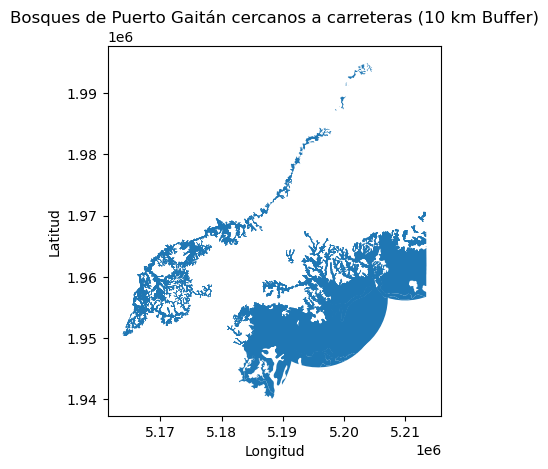

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar las capas necesarias
carreteras = gpd.read_file("C:\\Users\\Andres Wilches\\Documents\\programacion-sig\\Workshop_2_Attribute_and_Spatial_Data_Operations\\Data\\Via.shp")
coberturas = gpd.read_file("C:\\Users\\Andres Wilches\\Documents\\programacion-sig\\Workshop_2_Attribute_and_Spatial_Data_Operations\\Data\\Coberturas.shp") 
municipios = gpd.read_file("C:\\Users\\Andres Wilches\\Documents\\programacion-sig\\Workshop_2_Attribute_and_Spatial_Data_Operations\\Data\\Municipios.shp")

# Filtrar el municipio de Puerto Gaitán usando .loc() para aplicar condiciones
puerto_gaitan = municipios.loc[municipios["MpNombre"] == "Puerto Gaitan"]

# Filtrar las coberturas dentro del municipio de Puerto Gaitán
coberturas_pg = gpd.overlay(coberturas, puerto_gaitan, how="intersection", keep_geom_type=True)

# Crear un buffer de 10 km alrededor de las carreteras
carreteras_buffer = carreteras.buffer(10000)

# Convertir el buffer de carreteras a GeoDataFrame
carreteras_buffer_gdf = gpd.GeoDataFrame(geometry=carreteras_buffer, crs=carreteras.crs)

# Intersectar el buffer de las carreteras con las coberturas del municipio de Puerto Gaitán
coberturas_cercanas_carreteras = gpd.overlay(coberturas_pg, carreteras_buffer_gdf, how="intersection", keep_geom_type=True)

# Filtrar las coberturas que correspondan a bosques utilizando múltiples condiciones
bosques_pg_cercanos_carreteras = coberturas_cercanas_carreteras.loc[coberturas_cercanas_carreteras["nivel_3"] == "311"]

# Mostrar la salida de los resultados obtenidos
print(f"Número de bosques en Puerto Gaitán cercanos a carreteras: {len(bosques_pg_cercanos_carreteras)}")

# Visualizar el resultado en un gráfico (opcional)
bosques_pg_cercanos_carreteras.plot()
plt.title("Bosques de Puerto Gaitán cercanos a carreteras (10 km Buffer)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

Group data by a categorical attribute (e.g., land use type) and summarise other attributes like area or population.

In [12]:
import geopandas as gpd
import pandas as pd

# 1. Cargar las capas necesarias
coberturas = gpd.read_file("C:\\Users\\Andres Wilches\\Documents\\programacion-sig\\Workshop_2_Attribute_and_Spatial_Data_Operations\\Data\\Coberturas.shp")
municipios = gpd.read_file("C:\\Users\\Andres Wilches\\Documents\\programacion-sig\\Workshop_2_Attribute_and_Spatial_Data_Operations\\Data\\Municipios.shp") 
poblacion_victima = pd.read_csv("C:\\Users\\Andres Wilches\\Documents\\programacion-sig\\Workshop_2_Attribute_and_Spatial_Data_Operations\\Data\\Víctimas_por_hecho_victimizante_por_año_Corte_DICIEMBRE_DE_2024.csv", sep=";")

# 2. Verificar y reproyectar las capas a un sistema proyectado adecuado
coberturas = coberturas.to_crs(epsg=9377)
municipios = municipios.to_crs(epsg=9377)

# 3. Intersección de las coberturas con los municipios
coberturas_municipios = gpd.overlay(coberturas, municipios, how="intersection", keep_geom_type=False)

# 4. Calcular el área en hectáreas para cada polígono resultante
coberturas_municipios["area_ha"] = coberturas_municipios.geometry.area / 10_000

# 5. Asegurarse de que las claves de unión sean del mismo tipo
coberturas_municipios["MpCodigo"] = coberturas_municipios["MpCodigo"].astype(str)
poblacion_victima["COD_CIUDAD_MUNI"] = poblacion_victima["COD_CIUDAD_MUNI"].astype(str)

# 6. Unir la tabla de población víctima del conflicto armado
coberturas_municipios = coberturas_municipios.merge(poblacion_victima, left_on="MpCodigo", right_on="COD_CIUDAD_MUNI", how="left")

# 7. Agrupar por tipo de uso de suelo y resumir atributos (población total y área promedio)
resumen = coberturas_municipios.groupby("MpNombre").agg(
    Poblacion_Victima=("EVENTOS", "sum"),
    Coberturas_Area=("nivel_3", lambda x: list(x.unique()))
).reset_index()

# 9. Mostrar el resumen de los resultados
print(resumen)

        MpNombre  Poblacion_Victima  \
0       Cumaribo              98268   
1      Mapiripan              20230   
2  Puerto Gaitan             676753   

                                     Coberturas_Area  
0  [321, 311, 323, 313, 314, 244, 511, 231, 242, ...  
1      [314, 244, 323, 313, 311, 231, 243, 242, 511]  
2  [314, 231, 311, 242, 511, 321, 243, 323, 313, ...  


Merge geometries and summarise data by a grouping attribute (e.g., dissolve administrative boundaries into regions).

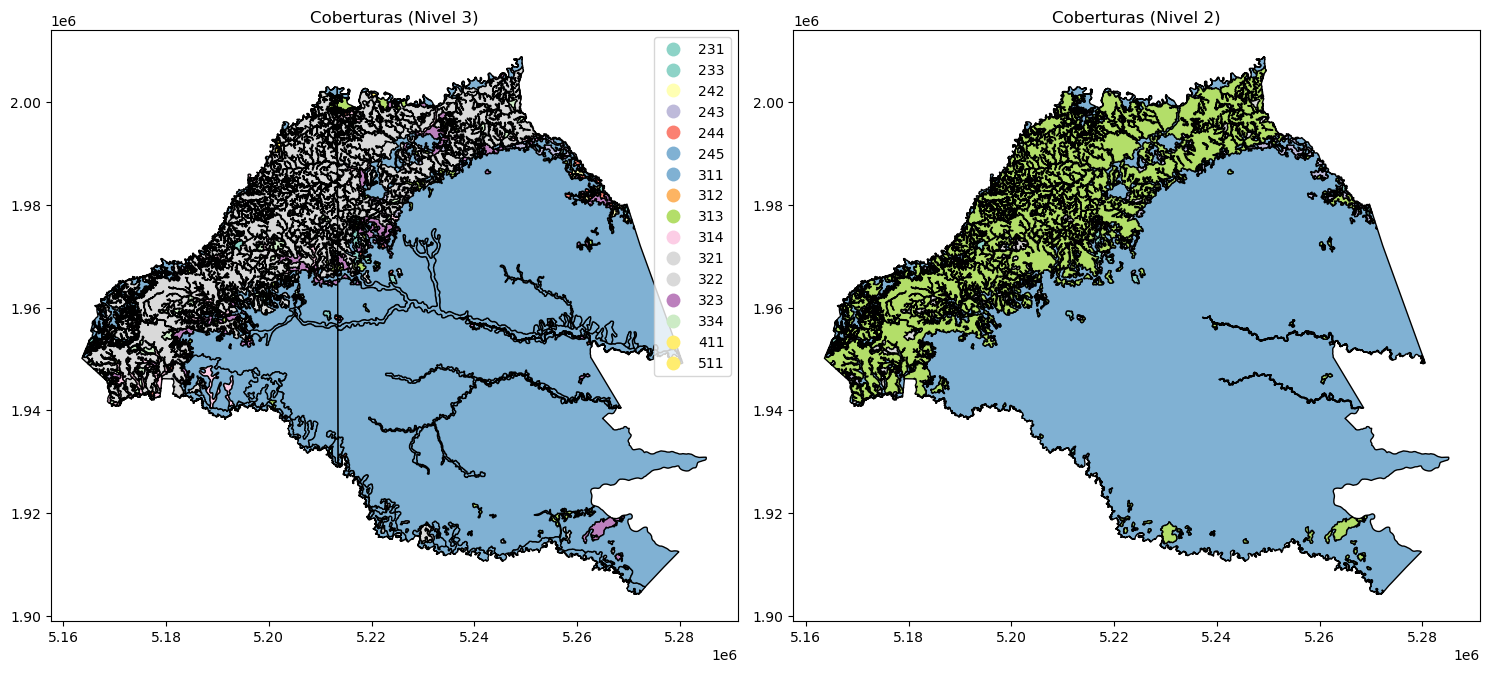

     nivel_3      area_ha
0        314     0.162519
1        314     0.162519
2        314     0.162519
3        314     0.162519
4        314     0.162519
...      ...          ...
1664     511  1624.574551
1665     511  1624.574551
1666     511  1624.574551
1667     511  1624.574551
1668     511  1624.574551

[1669 rows x 2 columns]
  nivel_2           area
0      23    2075.625801
1      24    7010.664477
2      31  511168.852511
3      32  146227.944176
4      33    4535.618994
5      41     170.382561
6      51    2117.361356


In [14]:
import geopandas as gpd
import pandas as pd

# 1. Cargar las capas necesarias
coberturas = gpd.read_file("C:\\Users\\Andres Wilches\\Documents\\programacion-sig\\Workshop_2_Attribute_and_Spatial_Data_Operations\\Data\\Coberturas.shp")
municipios = gpd.read_file("\\Users\\Andres Wilches\\Documents\\programacion-sig\\Workshop_2_Attribute_and_Spatial_Data_Operations\\Data\\Municipios.shp")

nivel_2 = coberturas.dissolve(by='nivel_2')

nivel_2['area'] = nivel_2.geometry.area/10_000

# 4. Restablecer el índice para acceder a la columna 'nivel_2' fácilmente
nivel_2 = nivel_2.reset_index()

# Crear una figura y un conjunto de subgráficos
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Mostrar la capa de municipios en el primer subgráfico
coberturas.plot(ax=ax[0], column='nivel_3', legend=True, cmap='Set3', edgecolor='black')
ax[0].set_title('Coberturas (Nivel 3)')

# Mostrar la capa disuelta por departamentos en el segundo subgráfico
nivel_2.plot(ax=ax[1], legend=True, cmap='Set3', edgecolor='black')
ax[1].set_title('Coberturas (Nivel 2)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print(coberturas[['nivel_3', 'area_ha']])
print(nivel_2[['nivel_2', 'area']])

### 5.2. Spatial Operations

#### 5.2.1. Spatial Relationships and Selection

##### 1. Select entities based on their spatial relationship: e.g.  Identify urban areas within a conservation zone.

###### Solución

Se van a seleccionar vías que están en el municipio de Puerto Gaitán. Para ello, se cargan los archivos shapefile de las carreteras y los municipios:

In [6]:
import geopandas as gpd

carreteras = gpd.read_file("Data\\Via.shp")
municipios = gpd.read_file("Data\\Municipios.shp")

Filtrar el municipio de Puerto Gaitán a partir de la columna 'MpNombre'. Esto selecciona únicamente el municipio que tiene el nombre 'Puerto Gaitan' en la columna correspondiente: 

In [40]:
Puerto_Gaitan = municipios[municipios['MpNombre'] == 'Puerto Gaitan']
Puerto_Gaitan

,FID_Limite,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,AREA_TOTAL,geometry
1,1500,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1,149,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946,"POLYGON Z ((5213329.219 2002795.708 0, 5213509..."


Comprobar qué carreteras intersectan con el municipio de Puerto Gaitán. Se usamos la función 'intersects' para verificar si las geometrías de las carreteras intersectan con la geometría de Puerto Gaitán (el primer elemento de la geometría de la capa de municipios): 

In [42]:
sel = carreteras.intersects(Puerto_Gaitan.geometry.iloc[0])
sel

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

Filtrar solo las carreteras que intersectan con Puerto Gaitán. Se aplica el filtro utilizando el resultado de la operación 'intersects'

In [44]:
pg_vias = carreteras[sel]
pg_vias

,TIPO_VIA,ESTADO_SUP,NUMERO_CAR,ACCESIBILI,NOMBRE_GEO,PROYECTO,SYMBOL,FECHA,PK_CUE,EJE_VIAL,geometry
0,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1974511.0,None,"LINESTRING Z (5189407.152 1956213.666 0, 51893..."
1,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1974512.0,None,"MULTILINESTRING Z ((5175345.87 1957827.731 0, ..."
2,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1974513.0,None,"LINESTRING Z (5180260.211 1946156.002 0, 51802..."
3,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975213.0,None,"LINESTRING Z (5178547.569 1964804.049 0, 51784..."
4,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975214.0,None,"MULTILINESTRING Z ((5188362.698 1967969.264 0,..."
5,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975216.0,None,"MULTILINESTRING Z ((5211570.96 1971431.813 0, ..."
6,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975218.0,None,"MULTILINESTRING Z ((5164088.743 1950284.637 0,..."
7,6,3350,Sin Valor,3601,None,None,2,0000/00/00,2073749.0,None,"LINESTRING Z (5174916.466 1955638.205 0, 51748..."
8,6,3350,Sin Valor,3601,None,None,2,0000/00/00,1975495.0,None,"MULTILINESTRING Z ((5173785.057 1962797.213 0,..."
9,6,3350,Sin Valor,3601,None,None,2,0000/00/00,1975496.0,None,"LINESTRING Z (5169487.683 1960143.615 0, 51695..."


Visualización - Mapa original de los municipios con las carreteras. Primero, se dibuja el mapa de municipios con un borde gris claro y fondo blanco. Luego, sobreponemos las carreteras con color rojo para visualizarlas:

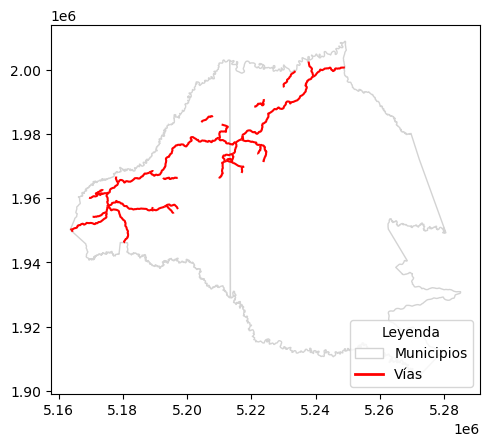

In [54]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

base = municipios.plot(color='white', edgecolor='lightgrey')
carreteras.plot(ax=base, color='red')

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='white', edgecolor='lightgrey', label='Municipios'),
    Line2D([0], [0], color='red', lw=2, label='Vías')
]

# Agregar la leyenda con ambos elementos
plt.legend(handles=handles, title="Leyenda", loc='lower right')

Visualización - Mapa de la intersección entre las carreteras y Puerto Gaitán. Nuevamente, se dibuja el mapa de municipios pero ahora se destaca a Puerto Gaitán con un color gris claro. Sobre este, se visualizan las carreteras que intersectan con el municipio, coloreándolas de verde:

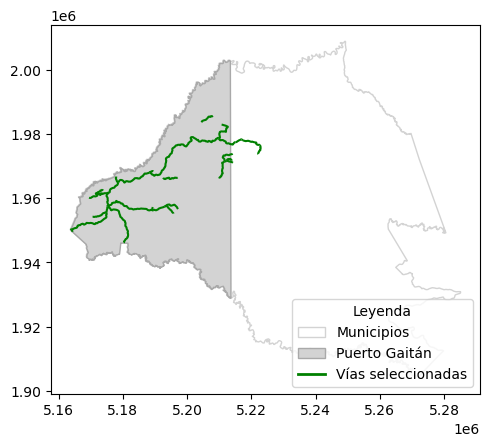

In [57]:
base = municipios.plot(color='white', edgecolor='lightgrey')
Puerto_Gaitan.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
pg_vias.plot(ax=base, color='green')


# Crear los handles para la leyenda
handles = [
    Patch(facecolor='white', edgecolor='lightgrey', label='Municipios'),
    Patch(facecolor='lightgrey', edgecolor='darkgrey', label='Puerto Gaitán'),
    Line2D([0], [0], color='green', lw=2, label='Vías seleccionadas')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower right')

##### 2. Identify entities that intersect with another layer. e.g. Rivers intersecting with hazard zones.

###### Solución

Se identifican vías que se intersectan con áreas de pastos y áreas abiertas. Para ello, se cargan archivos shapefile de coberturas y carreteras:

In [59]:
coberturas = gpd.read_file("Data\\Coberturas.shp")
carreteras = gpd.read_file("Data\\Via.shp")

Filtrar áreas de pastos y áreas abiertas. Se seleccionan las coberturas que corresponden a pastos (código 23) y áreas abiertas (código 33) en la columna 'nivel_2' de la capa de coberturas.

In [61]:
pastos_y_areasabiertas = coberturas[coberturas['nivel_2'].isin(['23', '33'])]

Identificar carreteras que se intersectan con las áreas de pastos y áreas abiertas. Se usa la función 'intersects' para verificar si las carreteras intersectan con las áreas de pastos y áreas abiertas. Para esto, unimos todas las geometrías de las áreas de pastos y áreas abiertas con 'union_all()'. La función 'union_all()' combina todas las geometrías en una sola.

In [63]:
sel = carreteras.intersects(pastos_y_areasabiertas.union_all())
sel

0     False
1     False
2      True
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21    False
22    False
23    False
24    False
25    False
dtype: bool

Filtrar carreteras que intersectan con las áreas de pastos y áreas abiertas. Se aplica el filtro utilizando el resultado de la operación 'intersects' 

In [65]:
vias_p_a = carreteras[sel]
vias_p_a

,TIPO_VIA,ESTADO_SUP,NUMERO_CAR,ACCESIBILI,NOMBRE_GEO,PROYECTO,SYMBOL,FECHA,PK_CUE,EJE_VIAL,geometry
2,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1974513.0,None,"LINESTRING Z (5180260.211 1946156.002 0, 51802..."
4,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975214.0,None,"MULTILINESTRING Z ((5188362.698 1967969.264 0,..."
19,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975393.0,None,"LINESTRING Z (5216936.986 1967869.798 0, 52170..."
20,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975394.0,None,"MULTILINESTRING Z ((5214208.302 1973820.626 0,..."


Visualización - Mapa original de coberturas con las carreteras. Primero, se dibuja el mapa de las coberturas con un borde gris claro y fondo blanco. Luego, sobreponemos las carreteras con color rojo para visualizarlas: 

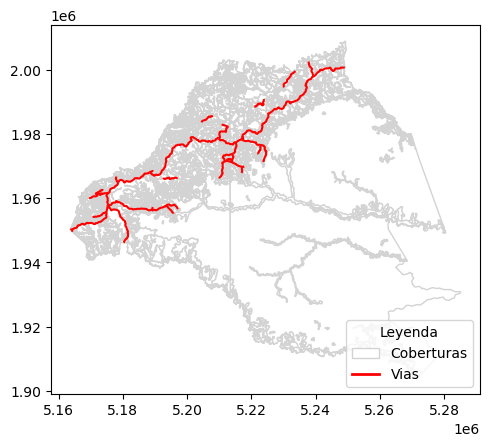

In [71]:
base = coberturas.plot(color='white', edgecolor='lightgrey')
carreteras.plot(ax=base, color='red');

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='white', edgecolor='lightgrey', label='Coberturas'),
    Line2D([0], [0], color='red', lw=2, label='Vias')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower right')

Visualización - Mapa de intersección entre las carreteras y las áreas de pastos y áreas abiertas. Nuevamente, se dibuja el mapa de coberturas pero ahora destacamos las áreas de pastos y áreas abiertas con un color gris claro, sobreponiendo las carreteras que intersectan con estas áreas en color verde.

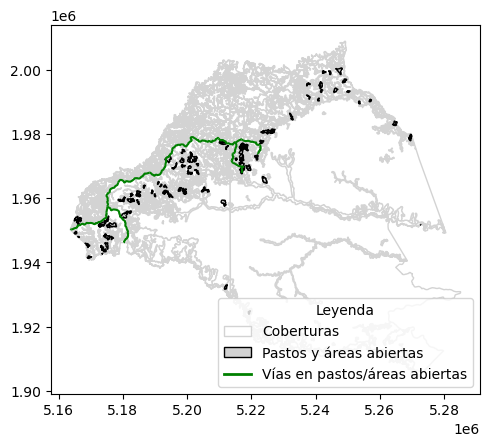

In [69]:
base = coberturas.plot(color='white', edgecolor='lightgrey')
pastos_y_areasabiertas.plot(ax=base, color='lightgrey', edgecolor='black')
vias_p_a.plot(ax=base, color='green');

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='white', edgecolor='lightgrey', label='Coberturas'),
    Patch(facecolor='lightgrey', edgecolor='black', label='Pastos y áreas abiertas'),
    Line2D([0], [0], color='green', lw=2, label='Vías en pastos/áreas abiertas')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower right')

#### 5.2.2. Areas of influence

##### 1. Create influence zones (buffer) around points or lines, such as rivers or roads.

###### Solución

Se procede a crear un buffer de 1000 m sobre las vías. Para ello, se procede a cargar el archivo shapefile de municipios:

In [73]:
municipios = gpd.read_file("Data\\Municipios.shp")

Establecer el sistema de referencia de coordenadas (CRS) adecuado. Se define el CRS (sistema de referencia espacial) como 9377, que corresponde al sistema UTM para evitar posibles problemas de proyección al crear el buffer de las vías.

In [75]:
crs = 9377

Crear un buffer de 1000 metros alrededor de las vías. Primero, se realiza una copia de la capa de carreteras para no modificar la original. Luego, se convierten las geometrías de las carreteras a la proyección del CRS 9377. Después, se usa el método .buffer(1000) para crear un buffer de 1000 metros alrededor de cada carretera:

In [77]:
vias_buffer = carreteras.copy().to_crs(crs)
vias_buffer.geometry = vias_buffer.buffer(1000)
vias_buffer

,TIPO_VIA,ESTADO_SUP,NUMERO_CAR,ACCESIBILI,NOMBRE_GEO,PROYECTO,SYMBOL,FECHA,PK_CUE,EJE_VIAL,geometry
0,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1974511.0,None,"POLYGON ((5188395.74 1957505.739, 5188403.564 ..."
1,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1974512.0,None,"POLYGON ((5174739.42 1957032.492, 5174728.632 ..."
2,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1974513.0,None,"POLYGON ((5175161.548 1956208.634, 5175153.19 ..."
3,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975213.0,None,"POLYGON ((5176892.329 1966524.459, 5176894.766..."
4,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975214.0,None,"POLYGON ((5164262.15 1949281.808, 5164175.113 ..."
5,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975216.0,None,"POLYGON ((5209077.417 1966513.065, 5209089.925..."
6,5,3306,Sin Valor,3601,None,None,2,0000/00/00,1975218.0,None,"POLYGON ((5163247.601 1949684.003, 5163204.389..."
7,6,3350,Sin Valor,3601,None,None,2,0000/00/00,2073749.0,None,"POLYGON ((5170674.347 1953206.25, 5170648.808 ..."
8,6,3350,Sin Valor,3601,None,None,2,0000/00/00,1975495.0,None,"POLYGON ((5170684.417 1961036.287, 5170679.04 ..."
9,6,3350,Sin Valor,3601,None,None,2,0000/00/00,1975496.0,None,"POLYGON ((5169748.189 1961108.708, 5169802.347..."


Visualización del resultado en un mapa. Primero, se dibuja el mapa de municipios con un borde gris claro y fondo blanco. Luego, se sobrepone los buffers de las vías, representados en color azul.

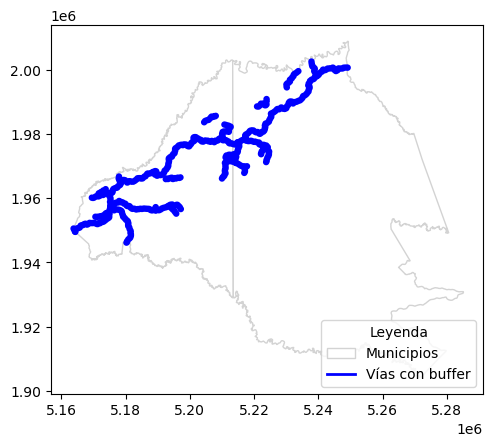

In [79]:
base = municipios.plot(color='white', edgecolor='lightgrey')
vias_buffer.plot(ax=base, color='blue')

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='white', edgecolor='lightgrey', label='Municipios'),
    Line2D([0], [0], color='blue', lw=2, label='Vías con buffer')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower right')

##### 2. Use the buffer to identify affected areas. e.g. Determine agricultural areas impacted by road buffers.

###### Solución

Se usa el buffer para determinar áreas de bosque de galería que son impactados por los buffer de vías. Para ello, se carga archivo shapefile de coberturas: 

In [81]:
coberturas = gpd.read_file("Data\\Coberturas.shp")

Filtrar los bosques de galería. Se filtran las coberturas para obtener solo aquellas con 'nivel_3' igual a '314', que corresponde a los bosques de galería.

In [83]:
bosques_galeria = coberturas[coberturas['nivel_3'].isin(['314'])]

Identificar las intersecciones entre los bosques de galería y las vías con buffer. Se utiliza el método .intersects() para determinar qué bosques de galería se intersectan con el buffer de las vías. El uso de .union_all() permite combinar todas las geometrías del buffer en una sola para realizar la operación de intersección.

In [85]:
sel = bosques_galeria.intersects(vias_buffer.union_all())

Filtrar solo los bosques de galería que se intersectan con las vías (y su buffer). Se seleccionan solo las áreas de bosques de galería que se intersectan con las vías y sus buffers.

In [87]:
bosques_galeria_intersect = bosques_galeria[sel]
bosques_galeria_intersect

,OBJECTID,codigo,leyenda,insumo,apoyo,confiabili,cambio,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,area_ha,ORIG_FID,Shape_Leng,Shape_Area,geometry
167,272382.0,314,3.1.4. Bosque de galería y ripario,L8_657_20200205p1,None,SI,1,3,31,314,None,None,None,376.599291,67,43178.989103,3.765993e+06,"POLYGON Z ((5203971.601 1967880.747 0, 5203932..."
168,272383.0,314,3.1.4. Bosque de galería y ripario,L8_657_20200205p1,None,SI,1,3,31,314,None,None,None,48.600122,68,7061.133610,4.860012e+05,"POLYGON Z ((5210033.243 1970097.469 0, 5210033..."
194,272407.0,314,3.1.4. Bosque de galería y ripario,L8_657_20200205p1,None,SI,1,3,31,314,None,None,None,6.555301,92,1756.122872,6.555301e+04,"POLYGON Z ((5213402.329 1972865.168 0, 5213398..."
216,272434.0,314,3.1.4. Bosque de galería y ripario,Landsat_2020_Mediana_07042021,GoogleEarth,SI,1,3,31,314,None,None,None,685.772267,108,139687.772900,6.857723e+06,"POLYGON Z ((5194279.983 1981765.853 0, 5194296..."
217,272435.0,314,3.1.4. Bosque de galería y ripario,Landsat_2020_Mediana_07042021,GoogleEarth,SI,1,3,31,314,None,None,None,42.776478,109,9130.679716,4.277648e+05,"POLYGON Z ((5198574.913 1977412.314 0, 5198568..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,285382.0,314,3.1.4. Bosque de galería y ripario,L8_657_20200205p1,None,SI,1,3,31,314,None,None,None,14.654497,778,128.146315,5.750542e+02,"POLYGON Z ((5213402.89 1972635.576 0, 5213402...."
1350,285382.0,314,3.1.4. Bosque de galería y ripario,L8_657_20200205p1,None,SI,1,3,31,314,None,None,None,14.654497,778,3044.995296,1.459699e+05,"POLYGON Z ((5214007.765 1971713.795 0, 5214008..."
1386,285414.0,314,3.1.4. Bosque de galería y ripario,Landsat_2020_Mediana_07042021,GoogleEarth,SI,1,3,31,314,None,None,None,990.778096,802,113365.394522,8.327907e+06,"POLYGON Z ((5215015.659 1988090.159 0, 5215038..."
1387,285414.0,314,3.1.4. Bosque de galería y ripario,Landsat_2020_Mediana_07042021,GoogleEarth,SI,1,3,31,314,None,None,None,990.778096,802,2055.112096,6.488600e+04,"POLYGON Z ((5213381.022 1981587.834 0, 5213380..."


Visualización en un mapa. Primero, se dibuja el mapa de municipios con borde gris claro y fondo blanco. Luego, se muestra los bosques de galería en color gris claro con borde oscuro. A continuación, se visualizan los bosques de galería que se intersectan con las vías en color gris claro y borde púrpura. Finalmente, se dibujan los buffers de las vías en color azul.

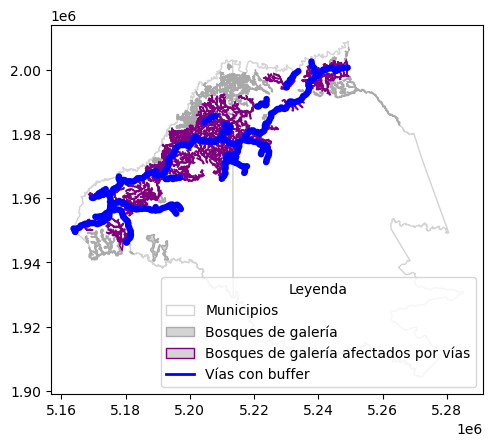

In [91]:
base = municipios.plot(color='white', edgecolor='lightgrey')
bosques_galeria.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
bosques_galeria_intersect.plot(ax=base, color='lightgrey', edgecolor='purple')
vias_buffer.plot(ax=base, color='blue')

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='white', edgecolor='lightgrey', label='Municipios'),
    Patch(facecolor='lightgrey', edgecolor='darkgrey', label='Bosques de galería'),
    Patch(facecolor='lightgrey', edgecolor='purple', label='Bosques de galería afectados por vías'),
    Line2D([0], [0], color='blue', lw=2, label='Vías con buffer')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower right')

#### 5.2.3. Overlay operations

##### 1. Combine two vector layers (e.g., conservation areas and hazard zones) to generate a new layer with the intersection. 

###### Solución

Se combina la capa de coberturas específicas y de municipios para generar la insertersección. Para ello, se cargan archivos shapefile de coberturas y municipios:

In [93]:
coberturas = gpd.read_file("Data\\Coberturas.shp")
municipios = gpd.read_file("Data\\Municipios.shp")

Filtrar coberturas específicas de interés. Se filtran las coberturas para obtener solo aquellas con 'nivel_3' igual a '411', '511', o '334'. 

In [95]:
coberturas_interes = coberturas[coberturas['nivel_3'].isin(['411','511','334'])]

Identificar municipios que se intersectan con las coberturas de interés. Se utiliza el método .intersects() para determinar qué municipios se intersectan con las coberturas específicas. El uso de .union_all() permite combinar todas las geometrías de las coberturas en una sola para realizar la operación de intersección.

In [97]:
municipios_x_coberturas = municipios[municipios.intersects(coberturas_interes.union_all())]
municipios_x_coberturas

,FID_Limite,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,AREA_TOTAL,geometry
0,1328,50325,Mapiripan,11917.401464,Ordenanza No. 11 de 1989,1,200,“No es apropiada su aplicación para la ubicaci...,Meta,33.861013,"MULTIPOLYGON Z (((5176114.636 1943033.105 0, 5..."
1,1500,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1,149,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946,"POLYGON Z ((5213329.219 2002795.708 0, 5213509..."
2,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986,"POLYGON Z ((5213509.28 1929080.432 0, 5213329...."


Realizar una unión espacial entre las coberturas de interés y los municipios. Se utiliza el método .sjoin() para realizar una unión espacial entre las dos capas, de modo que cada municipio tendrá la información de las coberturas de interés con las que se cruza

In [99]:
mxc_join = coberturas_interes.sjoin(municipios, how='left')
mxc_join

,OBJECTID,codigo,leyenda,insumo,apoyo,confiabili,cambio,nivel_1,nivel_2,nivel_3,...,FID_Limite,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,AREA_TOTAL
50,256925.0,511,5.1.1. Ríos,"L8_457_20200106, L8_557_20200113, Landsat_2020...","Basemap, GoogleEarth",SI,2,5,51,511,...,1328,50325,Mapiripan,11917.401464,Ordenanza No. 11 de 1989,1,200,“No es apropiada su aplicación para la ubicaci...,Meta,33.861013
50,256925.0,511,5.1.1. Ríos,"L8_457_20200106, L8_557_20200113, Landsat_2020...","Basemap, GoogleEarth",SI,2,5,51,511,...,1500,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1,149,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946
51,256925.0,511,5.1.1. Ríos,"L8_457_20200106, L8_557_20200113, Landsat_2020...","Basemap, GoogleEarth",SI,2,5,51,511,...,1328,50325,Mapiripan,11917.401464,Ordenanza No. 11 de 1989,1,200,“No es apropiada su aplicación para la ubicaci...,Meta,33.861013
51,256925.0,511,5.1.1. Ríos,"L8_457_20200106, L8_557_20200113, Landsat_2020...","Basemap, GoogleEarth",SI,2,5,51,511,...,1500,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1,149,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946
52,256925.0,511,5.1.1. Ríos,"L8_457_20200106, L8_557_20200113, Landsat_2020...","Basemap, GoogleEarth",SI,2,5,51,511,...,1328,50325,Mapiripan,11917.401464,Ordenanza No. 11 de 1989,1,200,“No es apropiada su aplicación para la ubicaci...,Meta,33.861013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,311003.0,511,5.1.1. Ríos,"L8_457_20200106, L8_557_20200113, Landsat_2020...","Basemap, GoogleEarth",SI,2,5,51,511,...,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986
1665,311003.0,511,5.1.1. Ríos,"L8_457_20200106, L8_557_20200113, Landsat_2020...","Basemap, GoogleEarth",SI,2,5,51,511,...,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986
1666,311003.0,511,5.1.1. Ríos,"L8_457_20200106, L8_557_20200113, Landsat_2020...","Basemap, GoogleEarth",SI,2,5,51,511,...,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986
1667,311003.0,511,5.1.1. Ríos,"L8_457_20200106, L8_557_20200113, Landsat_2020...","Basemap, GoogleEarth",SI,2,5,51,511,...,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986


Visualización de los resultados. Primero, se dibuja el mapa de municipios con borde gris claro y fondo blanco. Luego, se muestran las coberturas de interés con bordes rojos (sin color de relleno) sobre el mapa.

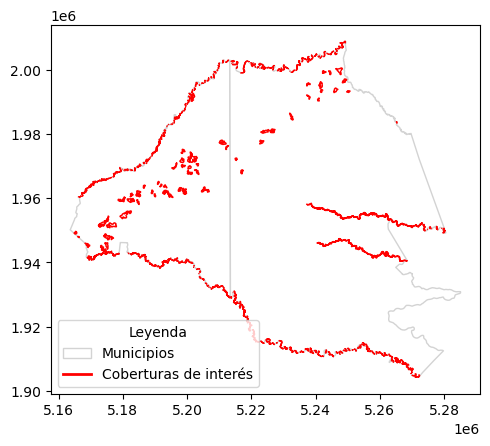

In [105]:
base = municipios.plot(color='white', edgecolor='lightgrey')
coberturas_interes.plot(ax=base, color='None', edgecolor='red')

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='white', edgecolor='lightgrey', label='Municipios'),
    Line2D([0], [0], color='red', lw=2, label='Coberturas de interés')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower left')

Visualizar los municipios que se intersectan con las coberturas de interés. Aquí, se muestran los municipios que se intersectan con las coberturas de interés, coloreados por el nombre del municipio

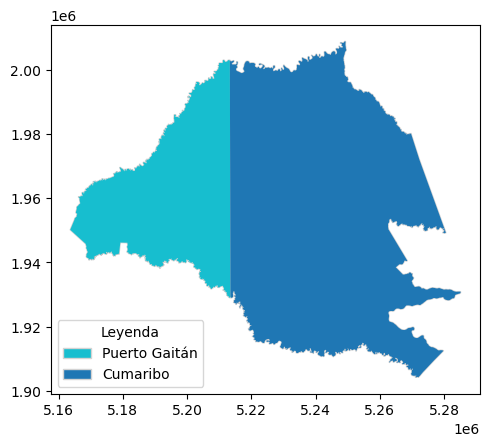

In [115]:
base = municipios.plot(color='white', edgecolor='lightgrey')
municipios_x_coberturas.plot(ax=base, column='MpNombre');

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='#17becf', edgecolor='lightgrey', label='Puerto Gaitán'),
    Patch(facecolor='#1f77b4', edgecolor='lightgrey', label='Cumaribo')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower left')

Visualización de la unión espacial (join). Se dibujan los municipios y se muestran las geometrías de la unión espacial (join) en gris. Posteriormente, se visualizan las coberturas de interés en color gris y las uniones espaciales con el color de 'nivel_3', con una leyenda para indicar qué significa cada color.

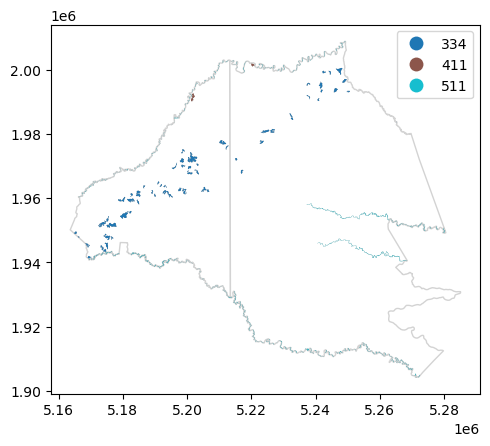

In [127]:
base = municipios.plot(color='white', edgecolor='lightgrey')
mxc_join.geometry.plot(ax=base, color='grey')
mxc_join.plot(ax=base, column='nivel_3', legend=True);

##### 2. Identify parts of a layer not overlapping with another. e.g.Conservation zones outside urban areas.

###### Solución

Se identifican humedales en coberturas transformadas, como indicio de humedales transformados o afectados. Para ello, se cargan archivos shapefile de coberturas y humedales:

In [130]:
coberturas = gpd.read_file("Data\\Coberturas.shp")
humedales = gpd.read_file("Data\\Humedales.shp")

Filtrar coberturas que pertenecen al nivel '2' (por ejemplo, zonas de conservación). Se filtran las coberturas para obtener solo aquellas que están en el nivel 1 igual a '2': 

In [132]:
coberturas_transformadas = coberturas[coberturas['nivel_1'].isin(['2'])]

Identificar humedales que se intersectan con las coberturas transformadas. Se encuentra la intersección de los humedales con las coberturas que han sido seleccionadas. Esto ayuda a identificar los humedales dentro de zonas de conservación

In [134]:
humedales_x_coberturas = humedales[humedales.intersects(coberturas_transformadas.union_all())]
humedales_x_coberturas

,FID_Humeda,Nivel_Hume,Area_Ha,Fecha_Ingr,Fecha_Reco,NOMAH,NOMZH,NOMSZH,Grado_Tran,FID_RI_UNU,...,MUNICIPIO,CODIGO_DAN,GlobalID,Shape__Are,Shape__Len,Shape_Leng,Shape_Le_1,Shape_Le_2,Shape_Area,geometry
27,233529,2,556.012019,2020-08-28,0000/00/00,Orinoco,Vichada,Alto Vichada,Natural,0,...,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.242395,26876.776205,5.262702e+06,"POLYGON Z ((5165879.926 1956823.107 0, 5165879..."
35,233537,2,5.423633,2020-08-28,0000/00/00,Orinoco,Vichada,Alto Vichada,Natural,0,...,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.036321,4024.668579,5.418951e+04,"MULTIPOLYGON Z (((5172353.694 1954930.184 0, 5..."
54,233560,2,0.976523,2020-08-28,0000/00/00,Orinoco,Vichada,Alto Vichada,Transformado,0,...,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.029295,3252.165935,9.756412e+03,"MULTIPOLYGON Z (((5169031.652 1954137.145 0, 5..."
63,233942,2,173.503146,2020-08-28,0000/00/00,Orinoco,Vichada,Alto Vichada,Natural,0,...,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.139551,15455.894200,1.733758e+06,"POLYGON Z ((5187421.462 1970317.117 0, 5187387..."
71,234525,1,93.043699,2020-08-28,0000/00/00,Orinoco,Vichada,Alto Vichada,-,0,...,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.262868,29124.833939,9.012037e+05,"MULTIPOLYGON Z (((5184936.36 1969913.424 0, 51..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,265309,1,99.968461,2020-08-28,0000/00/00,Orinoco,Guaviare,Río Iteviare,-,0,...,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.143474,15899.128365,9.992048e+05,"MULTIPOLYGON Z (((5211479.052 1931575.973 0, 5..."
3687,265312,1,114.639137,2020-08-28,0000/00/00,Orinoco,Guaviare,Río Iteviare,-,0,...,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.162484,18006.222576,1.145453e+06,"MULTIPOLYGON Z (((5208960.821 1933212.413 0, 5..."
3694,265330,1,1.636066,2020-08-28,0000/00/00,Orinoco,Guaviare,Río Iteviare,-,0,...,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.000312,34.475279,1.005300e+01,"MULTIPOLYGON Z (((5190206.252 1938961.094 0, 5..."
3701,265341,1,17.733602,2020-08-28,0000/00/00,Orinoco,Guaviare,Río Iteviare,-,0,...,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.060815,6736.234167,1.772507e+05,"MULTIPOLYGON Z (((5211799.223 1932845.606 0, 5..."


Realizar una unión espacial entre las coberturas transformadas y los humedales. El método .sjoin() se utiliza para realizar una unión espacial entre las capas de humedales y las coberturas transformadas. De esta manera, se asignan las propiedades de las coberturas a los humedales que se intersectan con ellas:

In [136]:
hxc_join = coberturas_transformadas.sjoin(humedales, how='left')
hxc_join

,OBJECTID_left,codigo,leyenda,insumo,apoyo,confiabili,cambio,nivel_1,nivel_2,nivel_3,...,DEPARTAMEN,MUNICIPIO,CODIGO_DAN,GlobalID,Shape__Are,Shape__Len,Shape_Leng_right,Shape_Le_1,Shape_Le_2,Shape_Area_right
6,252930.0,244,2.4.4. Mosaico de pastos con espacios naturales,L8_658_20200205p1,None,SI,2,2,24,244,...,99,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,1.388824,153941.067770,2.553928e+06
6,252930.0,244,2.4.4. Mosaico de pastos con espacios naturales,L8_658_20200205p1,None,SI,2,2,24,244,...,99,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.013996,1549.183350,2.374348e+03
6,252930.0,244,2.4.4. Mosaico de pastos con espacios naturales,L8_658_20200205p1,None,SI,2,2,24,244,...,99,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.002572,284.605323,1.113019e+03
6,252930.0,244,2.4.4. Mosaico de pastos con espacios naturales,L8_658_20200205p1,None,SI,2,2,24,244,...,99,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.003438,380.652100,8.613971e+02
18,253003.0,231,2.3.1. Pastos limpios,L8_658_20200205p1,None,SI,2,2,23,231,...,99,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,1.388824,153941.067770,2.553928e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,285521.0,244,2.4.4. Mosaico de pastos con espacios naturales,Landsat_2020_Mediana_07042021,GoogleEarth,SI,1,2,24,244,...,99,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.849022,94060.286482,9.208206e+06
1396,285521.0,244,2.4.4. Mosaico de pastos con espacios naturales,Landsat_2020_Mediana_07042021,GoogleEarth,SI,1,2,24,244,...,99,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.074343,8241.645772,5.804461e+05
1411,285644.0,244,2.4.4. Mosaico de pastos con espacios naturales,L8_657_20200205p1,None,SI,2,2,24,244,...,99,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.008434,934.765868,2.971992e+04
1411,285644.0,244,2.4.4. Mosaico de pastos con espacios naturales,L8_657_20200205p1,None,SI,2,2,24,244,...,99,99773,1338,{B6B40B25-9950-436B-963E-0BDCA375F1CF},6.733064e+09,714187.420836,714187.420836,0.006402,710.177298,2.239238e+03


Visualización de los resultados. Primero, se dibuja el mapa de humedales con borde gris claro y fondo blanco. Luego, se muestra las coberturas transformadas con bordes rojos (sin color de relleno) sobre el mapa.

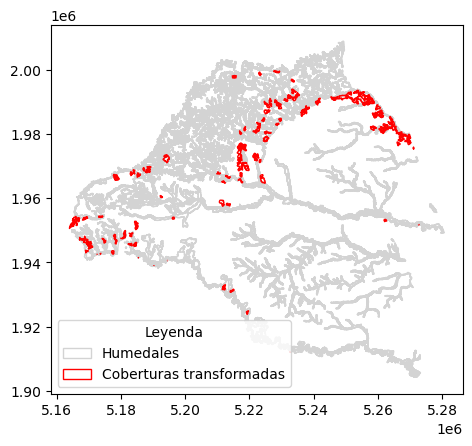

In [141]:
base = humedales.plot(color='white', edgecolor='lightgrey')
coberturas_transformadas.plot(ax=base, color='None', edgecolor='red');

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='white', edgecolor='lightgrey', label='Humedales'),
    Patch(facecolor='white', edgecolor='red', label='Coberturas transformadas')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower left')

Visualizar los humedales que se intersectan con las coberturas transformadas. Aquí, se muestran los humedales que se intersectan con las coberturas seleccionadas, coloreados por la columna 'Nivel_Hume'

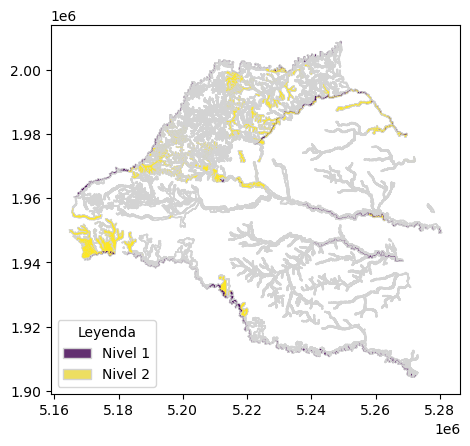

In [143]:
base = humedales.plot(color='white', edgecolor='lightgrey')
humedales_x_coberturas.plot(ax=base, column='Nivel_Hume');

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='#622f70', edgecolor='lightgrey', label='Nivel 1'),
    Patch(facecolor='#edde61', edgecolor='lightgrey', label='Nivel 2')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower left')

Visualización de la unión espacial (join). Se dibuja los humedales y mostramos las geometrías de la unión espacial (join) en gris. Posteriormente, se visualizan las coberturas transformadas en color gris y las uniones espaciales con el color de 'nivel_3', con una leyenda para indicar qué significa cada color:

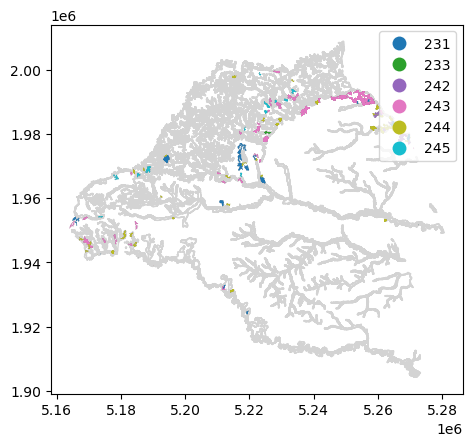

In [516]:
base = humedales.plot(color='white', edgecolor='lightgrey')
hxc_join.geometry.plot(ax=base, color='grey')
hxc_join.plot(ax=base, column='nivel_3', legend=True);

#### 5.2.4. Joins

##### 1. Perform a spatial join. e.g. Enrich a layer of crop points with attributes from administrative regions.

###### Solución

Enriquecer puntos de parcelas de bosque con los datos de los municipios. Se importa la librería necesaria y se carga la capa de municipios desde el archivo shapefile:

In [145]:
import numpy as np

municipios = gpd.read_file("Data\\Municipios.shp")

Fijar una semilla para hacer los resultados reproducibles. Obtener los límites totales de la capa de municipios. Se generan 10 puntos aleatorios dentro de los límites del municipio 'x' y 'y' son las coordenadas de los puntos generados aleatoriamente dentro del bounding box de los municipios.

In [147]:
np.random.seed(1)       ## set seed for reproducibility
bb = municipios.total_bounds  ## the world's bounds
x = np.random.uniform(low=bb[0], high=bb[2], size=10)
y = np.random.uniform(low=bb[1], high=bb[3], size=10)

Crear una GeoDataFrame con los puntos aleatorios generados. Se usa la función 'points_from_xy' de geopandas para convertir las coordenadas (x, y) a geometrías de puntos.

In [149]:
random_points = gpd.points_from_xy(x, y, crs=9377)
plot_forest = gpd.GeoDataFrame({'geometry': random_points})
plot_forest

,geometry
0,POINT (5214310.678 1948075.339)
1,POINT (5251170.025 1975903.617)
2,POINT (5163645.275 1925611.632)
3,POINT (5200372.851 1996082.238)
4,POINT (5181466.132 1907089.295)
5,POINT (5174852.979 1974360.444)
6,POINT (5186266.962 1947877.661)
7,POINT (5205626.226 1962667.631)
8,POINT (5211849.212 1918909.903)
9,POINT (5229111.988 1924947.293)


Convertir la capa de municipios al CRS de los puntos aleatorios. Se asegura que ambas capas tengan el mismo CRS para poder realizar la operación espacial correctamente

In [151]:
municipios = municipios.to_crs(plot_forest.crs)

Seleccionar los municipios que intersectan con los puntos generados aleatoriamente. Esto permite identificar en qué municipios caen los puntos aleatorios:

In [153]:
municipios_random = municipios[municipios.intersects(plot_forest.union_all())]
municipios_random

,FID_Limite,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,AREA_TOTAL,geometry
1,1500,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1,149,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946,"POLYGON Z ((5213329.219 2002795.708 0, 5213509..."
2,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986,"POLYGON Z ((5213509.28 1929080.432 0, 5213329...."


Realizar una unión espacial (spatial join) entre los puntos aleatorios y los municipios. El método 'sjoin' permite unir las columnas de los municipios con los puntos aleatorios que caen dentro de sus límites.

In [155]:
random_joined = plot_forest.sjoin(municipios, how='left')
random_joined

,geometry,index_right,FID_Limite,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,AREA_TOTAL
0,POINT (5214310.678 1948075.339),2.0,1669.0,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1.0,161.0,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986
1,POINT (5251170.025 1975903.617),2.0,1669.0,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1.0,161.0,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986
2,POINT (5163645.275 1925611.632),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (5200372.851 1996082.238),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POINT (5181466.132 1907089.295),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,POINT (5174852.979 1974360.444),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,POINT (5186266.962 1947877.661),1.0,1500.0,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1.0,149.0,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946
7,POINT (5205626.226 1962667.631),1.0,1500.0,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1.0,149.0,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946
8,POINT (5211849.212 1918909.903),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,POINT (5229111.988 1924947.293),2.0,1669.0,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1.0,161.0,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986


Visualización de los resultados. Dibujar el mapa de municipios con borde gris claro y fondo blanco. Luego, mostrar los puntos generados aleatoriamente (en rojo) sobre el mapa

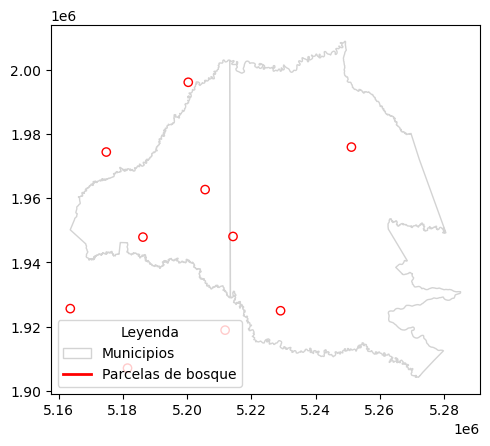

In [161]:
base = municipios.plot(color='white', edgecolor='lightgrey')
plot_forest.plot(ax=base, color='None', edgecolor='red');

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='white', edgecolor='lightgrey', label='Municipios'),
    Line2D([0], [0], color='red', lw=2, label='Parcelas de bosque')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='lower left')

Visualizar los municipios que contienen los puntos generados. Mostrar los municipios que se intersectan con los puntos aleatorios, coloreados por el nombre del municipio ('MpNombre').

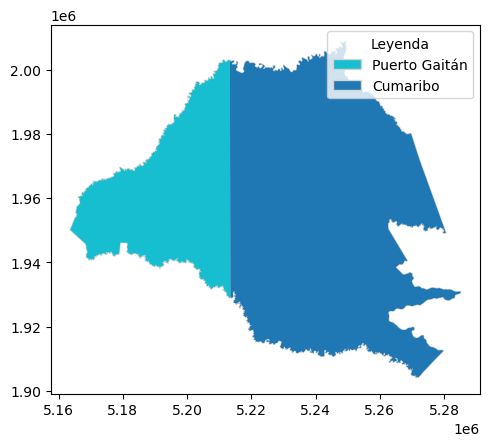

In [163]:
base = municipios.plot(color='white', edgecolor='lightgrey')
municipios_random.plot(ax=base, column='MpNombre');

# Crear los handles para la leyenda
handles = [
    Patch(facecolor='#17becf', edgecolor='lightgrey', label='Puerto Gaitán'),
    Patch(facecolor='#1f77b4', edgecolor='lightgrey', label='Cumaribo')
]

# Agregar la leyenda
plt.legend(handles=handles, title="Leyenda", loc='upper right')

Visualización de los puntos con la información de los municipios unida. Mostrar los puntos aleatorios en gris, y luego agregar la información unida de los municipios.

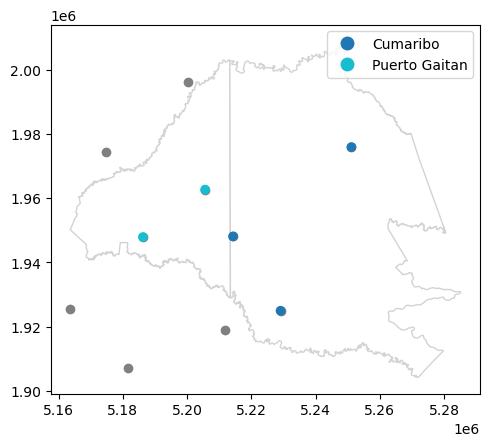

In [578]:
base = municipios.plot(color='white', edgecolor='lightgrey')
random_joined.geometry.plot(ax=base, color='grey')
random_joined.plot(ax=base, column='MpNombre', legend=True);

#### 5.2.5. Joining Incongruent Layers

##### 1. Create a synthetic grid layer of rectangular polygons over the extent of their project data.

###### Solución

Este código tiene como objetivo crear una capa de cuadrícula sintética de polígonos rectangulares sobre la extensión de los datos de un proyecto. La cuadrícula se genera automáticamente a partir de los límites de un área de estudio (en este caso, los municipios), y cada celda de la cuadrícula tiene un tamaño definido (10 km x 10 km). Importar la librería shapely para trabajar con geometrías. Se carga la capa de municipios desde un archivo shapefile.

In [756]:
import shapely

municipios = gpd.read_file("Data\\Municipios.shp")

Configuración de la cuadrícula: extensión, resolución y CRS. 

In [758]:
#Obtener los límites (bounding box) de la capa de municipios
bounds = municipios.total_bounds
# Obtener el sistema de referencia de coordenadas (CRS) de la capa de municipios
crs = municipios.crs
# Definir la resolución de la cuadrícula (tamaño de las celdas en metros)
res = 10000  # 10 km por celda

Calcular las dimensiones de la cuadrícula a partir de los límites

In [760]:
xmin, ymin, xmax, ymax = bounds

Crear listas de las posiciones en las que estarán las columnas y filas de la cuadrícula

In [762]:
# Las columnas se calculan en función de los límites 'xmin' y 'xmax', con una separación de 'res'
cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax+res)), res))
# Las filas se calculan en función de los límites 'ymin' y 'ymax', con una separación de 'res'
# Se invierten para crear filas en orden de abajo hacia arriba (como en un sistema de coordenadas cartesiano)
rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax+res)), res))
rows.reverse()

Para cada celda en la cuadrícula, crear un polígono rectangular con 'shapely'.

In [764]:
# Utilizamos 'shapely.Polygon' para crear un rectángulo definido por las coordenadas de las esquinas
polygons = []
for x in cols:
    for y in rows:
        polygons.append(
            shapely.Polygon([(x,y), (x+res, y), (x+res, y-res), (x, y-res)])
        )

Crear un GeoDataFrame con los polígonos generados

In [766]:
# Cada polígono representa una celda de la cuadrícula
grid = gpd.GeoDataFrame({'geometry': polygons}, crs=crs)

Eliminar las filas y columnas de la cuadrícula que están fuera de los límites de la capa de municipios

In [768]:
# Usamos 'intersects' para asegurarnos de que los polígonos de la cuadrícula estén dentro de la extensión de los municipios
sel = grid.intersects(shapely.box(*bounds))  # 'shapely.box(*bounds)' crea un polígono del bounding box
grid = grid[sel]  # Seleccionar solo los polígonos que intersectan con los límites del municipio

Add unique IDs to each grid cell.

In [770]:
grid['id'] = grid.index
grid

,geometry,id
0,"POLYGON ((5163631 2014224, 5173631 2014224, 51...",0
1,"POLYGON ((5163631 2004224, 5173631 2004224, 51...",1
2,"POLYGON ((5163631 1994224, 5173631 1994224, 51...",2
3,"POLYGON ((5163631 1984224, 5173631 1984224, 51...",3
4,"POLYGON ((5163631 1974224, 5173631 1974224, 51...",4
...,...,...
150,"POLYGON ((5283631 1954224, 5293631 1954224, 52...",150
151,"POLYGON ((5283631 1944224, 5293631 1944224, 52...",151
152,"POLYGON ((5283631 1934224, 5293631 1934224, 52...",152
153,"POLYGON ((5283631 1924224, 5293631 1924224, 52...",153


##### 2. Calculate the area-weighted proportion for each attribute in the project layer and assign it to the grid.

###### Solución 

Este código tiene como objetivo realizar un análisis espacial para calcular el área de bosque por municipio, asignando áreas específicas de bosque a celdas de una cuadrícula. Se cargan las capas de coberturas y municipios desde archivos shapefile

In [772]:
coberturas = gpd.read_file("Data\\Coberturas.shp")
municipios = gpd.read_file("Data\\Municipios.shp")

Filtrar las coberturas para obtener solo aquellas relacionadas con bosques.

In [774]:
# Se seleccionan las coberturas de los niveles 311, 314 y 313 (tipos de bosques)
bosque = coberturas[coberturas['nivel_3'].isin(['311','314','313'])]

Seleccionar los municipios que intersectan con las coberturas de bosque.

In [776]:
municipios_x_bosque = municipios[municipios.intersects(bosque.union_all())]
municipios_x_bosque

,FID_Limite,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,AREA_TOTAL,geometry
0,1328,50325,Mapiripan,11917.401464,Ordenanza No. 11 de 1989,1,200,“No es apropiada su aplicación para la ubicaci...,Meta,33.861013,"MULTIPOLYGON Z (((5176114.636 1943033.105 0, 5..."
1,1500,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1,149,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946,"POLYGON Z ((5213329.219 2002795.708 0, 5213509..."
2,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986,"POLYGON Z ((5213509.28 1929080.432 0, 5213329...."


Realizar una unión espacial entre los municipios y las coberturas de bosque.

In [778]:
mxc_join = bosque.sjoin(municipios, how='left')
mxc_join

,OBJECTID,codigo,leyenda,insumo,apoyo,confiabili,cambio,nivel_1,nivel_2,nivel_3,...,FID_Limite,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,AREA_TOTAL
0,252916.0,314,3.1.4. Bosque de galería y ripario,L8_658_20200205p1,None,SI,1,3,31,314,...,1328,50325,Mapiripan,11917.401464,Ordenanza No. 11 de 1989,1,200,“No es apropiada su aplicación para la ubicaci...,Meta,33.861013
0,252916.0,314,3.1.4. Bosque de galería y ripario,L8_658_20200205p1,None,SI,1,3,31,314,...,1500,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1,149,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946
1,252916.0,314,3.1.4. Bosque de galería y ripario,L8_658_20200205p1,None,SI,1,3,31,314,...,1328,50325,Mapiripan,11917.401464,Ordenanza No. 11 de 1989,1,200,“No es apropiada su aplicación para la ubicaci...,Meta,33.861013
1,252916.0,314,3.1.4. Bosque de galería y ripario,L8_658_20200205p1,None,SI,1,3,31,314,...,1500,50568,Puerto Gaitan,17199.254178,Ordenanza No. 39 de 1969,1,149,“No es apropiada su aplicación para la ubicaci...,Meta,186676.364946
2,252916.0,314,3.1.4. Bosque de galería y ripario,L8_658_20200205p1,None,SI,1,3,31,314,...,1328,50325,Mapiripan,11917.401464,Ordenanza No. 11 de 1989,1,200,“No es apropiada su aplicación para la ubicaci...,Meta,33.861013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,287434.0,31111,3.1.1.1.1. Bosque denso alto de tierra firme,L8_658_20200205p1,None,SI,2,3,31,311,...,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986
1425,287434.0,31111,3.1.1.1.1. Bosque denso alto de tierra firme,L8_658_20200205p1,None,SI,2,3,31,311,...,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986
1426,287434.0,31111,3.1.1.1.1. Bosque denso alto de tierra firme,L8_658_20200205p1,None,SI,2,3,31,311,...,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986
1427,287434.0,31111,3.1.1.1.1. Bosque denso alto de tierra firme,L8_658_20200205p1,None,SI,2,3,31,311,...,1669,99773,Cumaribo,65187.505271,Ordenanza No. 66 de 1996,1,161,“No es apropiada su aplicación para la ubicaci...,Vichada,486596.210986


Calcular el área de bosque por municipio en hectáreas

La geometría de cada polígono se obtiene y se convierte a hectáreas (dividiendo por 10,000)

In [780]:
mxc_join["area_bosque_ha"] = mxc_join.geometry.area / 10_000

Agrupar los resultados por municipio y sumar las áreas de bosque

In [782]:
# Esto genera una nueva tabla con el área total de bosque en hectáreas por municipio
area_bosque_municipio = mxc_join.groupby("MpNombre").agg(
    {"area_bosque_ha": "sum"}).reset_index()

Realizar una unión de la tabla de municipios con las áreas de bosque por municipio.

In [784]:
# Esto agrega la columna de área de bosque a la capa de municipios
municipios_con_bosque = municipios.merge(area_bosque_municipio, left_on="MpNombre", right_on="MpNombre", how="left")

Graficar el resultado: municipios con área de bosque representada en un mapa

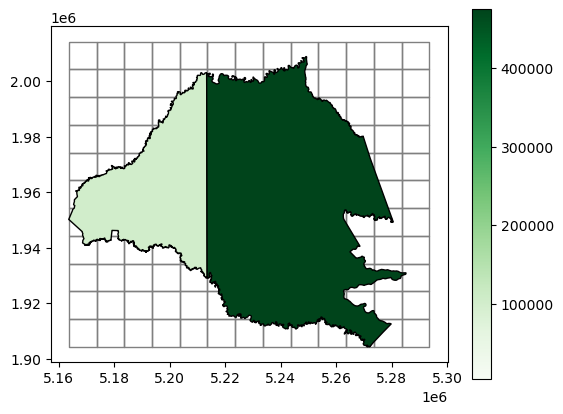

In [786]:
base = grid.plot(color='none', edgecolor='grey')
municipios_con_bosque.plot(
    ax=base, 
    column='area_bosque_ha', 
    edgecolor='black', 
    legend=True, 
    cmap='Greens'
);

Realizar un overlay entre los municipios y la cuadrícula previamente generada

In [788]:
# Esto genera una nueva capa con la superposición de la cuadrícula y los municipios con bosque
bosques_grid = municipios_con_bosque.overlay(grid)
bosques_grid = bosques_grid[['id', 'AREA_TOTAL', 'area_bosque_ha', 'geometry']]
bosques_grid

,id,AREA_TOTAL,area_bosque_ha,geometry
0,7,33.861013,4039.894868,"MULTIPOLYGON Z (((5173481.261 1942503.259 0, 5..."
1,19,33.861013,4039.894868,"MULTIPOLYGON Z (((5176124.564 1943040.518 0, 5..."
2,31,33.861013,4039.894868,"MULTIPOLYGON Z (((5183908.324 1942897.492 0, 5..."
3,43,33.861013,4039.894868,"MULTIPOLYGON Z (((5195124.746 1941180.78 0, 51..."
4,56,33.861013,4039.894868,"MULTIPOLYGON Z (((5206207.092 1933128.057 0, 5..."
...,...,...,...,...
102,138,486596.210986,474766.570711,"POLYGON Z ((5280576.661 1949238.381 0, 5280552..."
103,140,486596.210986,474766.570711,"POLYGON Z ((5273657.133 1931893.389 0, 5273701..."
104,141,486596.210986,474766.570711,"POLYGON Z ((5273631.222 1917153.977 0, 5273660..."
105,142,486596.210986,474766.570711,"POLYGON Z ((5275229.049 1914169.064 0, 5275231..."


Graficar el resultado de la cuadrícula con el área de bosque por celda

<Axes: >

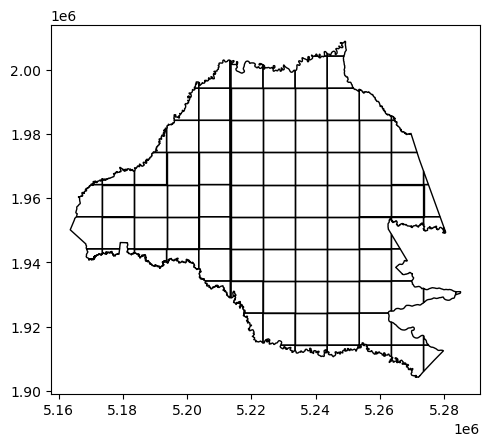

In [790]:
bosques_grid.plot(color='none', edgecolor='black')

Calcular el área de cada celda de la cuadrícula

In [792]:
bosques_grid['area_sub'] = bosques_grid.area
bosques_grid

,id,AREA_TOTAL,area_bosque_ha,geometry,area_sub
0,7,33.861013,4039.894868,"MULTIPOLYGON Z (((5173481.261 1942503.259 0, 5...",1.134528e+05
1,19,33.861013,4039.894868,"MULTIPOLYGON Z (((5176124.564 1943040.518 0, 5...",8.074149e+04
2,31,33.861013,4039.894868,"MULTIPOLYGON Z (((5183908.324 1942897.492 0, 5...",1.334230e+05
3,43,33.861013,4039.894868,"MULTIPOLYGON Z (((5195124.746 1941180.78 0, 51...",1.043120e+04
4,56,33.861013,4039.894868,"MULTIPOLYGON Z (((5206207.092 1933128.057 0, 5...",5.615691e+02
...,...,...,...,...,...
102,138,486596.210986,474766.570711,"POLYGON Z ((5280576.661 1949238.381 0, 5280552...",2.173035e+07
103,140,486596.210986,474766.570711,"POLYGON Z ((5273657.133 1931893.389 0, 5273701...",3.033893e+07
104,141,486596.210986,474766.570711,"POLYGON Z ((5273631.222 1917153.977 0, 5273660...",1.984779e+06
105,142,486596.210986,474766.570711,"POLYGON Z ((5275229.049 1914169.064 0, 5275231...",2.552910e+07


Graficar el área de las celdas de la cuadrícula con el área de bosque

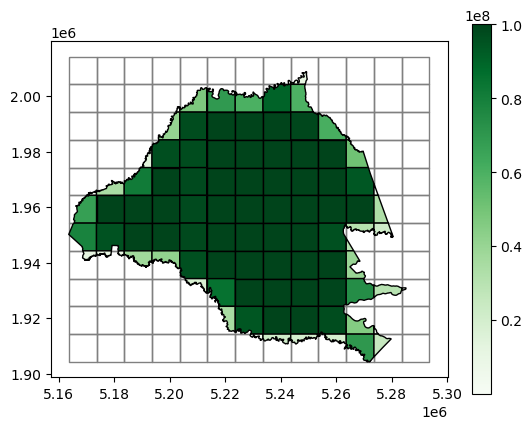

In [794]:
base = grid.plot(color='none', edgecolor='grey')
bosques_grid.plot(
    ax=base, 
    column='area_sub', 
    edgecolor='black',
    legend=True, 
    cmap='Greens'
);

Calcular la proporción de bosque dentro de cada celda de la cuadrícula y calcular el área de bosque para cada celda de la cuadrícula, tomando en cuenta la proporción de bosque.

In [796]:
bosques_grid['area_prop'] = bosques_grid['area_sub'] / bosques_grid['AREA_TOTAL']
bosques_grid['bosques'] = bosques_grid['area_bosque_ha'] * bosques_grid['area_prop']
bosques_grid

,id,AREA_TOTAL,area_bosque_ha,geometry,area_sub,area_prop,bosques
0,7,33.861013,4039.894868,"MULTIPOLYGON Z (((5173481.261 1942503.259 0, 5...",1.134528e+05,3350.544852,1.353585e+07
1,19,33.861013,4039.894868,"MULTIPOLYGON Z (((5176124.564 1943040.518 0, 5...",8.074149e+04,2384.497255,9.633118e+06
2,31,33.861013,4039.894868,"MULTIPOLYGON Z (((5183908.324 1942897.492 0, 5...",1.334230e+05,3940.314040,1.591845e+07
3,43,33.861013,4039.894868,"MULTIPOLYGON Z (((5195124.746 1941180.78 0, 51...",1.043120e+04,308.059320,1.244527e+06
4,56,33.861013,4039.894868,"MULTIPOLYGON Z (((5206207.092 1933128.057 0, 5...",5.615691e+02,16.584534,6.699977e+04
...,...,...,...,...,...,...,...
102,138,486596.210986,474766.570711,"POLYGON Z ((5280576.661 1949238.381 0, 5280552...",2.173035e+07,44.657872,2.120206e+07
103,140,486596.210986,474766.570711,"POLYGON Z ((5273657.133 1931893.389 0, 5273701...",3.033893e+07,62.349290,2.960136e+07
104,141,486596.210986,474766.570711,"POLYGON Z ((5273631.222 1917153.977 0, 5273660...",1.984779e+06,4.078903,1.936527e+06
105,142,486596.210986,474766.570711,"POLYGON Z ((5275229.049 1914169.064 0, 5275231...",2.552910e+07,52.464655,2.490846e+07


Agrupar por el identificador de la celda (id) y sumar el área de bosque.

In [798]:
#Esto genera una tabla con la suma de áreas de bosque por celda de la cuadrícula
bosques_grid = bosques_grid.groupby('id')['bosques'].sum().reset_index()
grid = pd.merge(grid, bosques_grid[['id', 'bosques']], on='id', how='left')
# Unir la tabla con las celdas de la cuadrícula con las áreas de bosque calculadas
grid

,geometry,id,bosques
0,"POLYGON ((5163631 2014224, 5173631 2014224, 51...",0,NaN
1,"POLYGON ((5163631 2004224, 5173631 2004224, 51...",1,NaN
2,"POLYGON ((5163631 1994224, 5173631 1994224, 51...",2,NaN
3,"POLYGON ((5163631 1984224, 5173631 1984224, 51...",3,NaN
4,"POLYGON ((5163631 1974224, 5173631 1974224, 51...",4,1.655704e+06
...,...,...,...
138,"POLYGON ((5283631 1954224, 5293631 1954224, 52...",150,NaN
139,"POLYGON ((5283631 1944224, 5293631 1944224, 52...",151,NaN
140,"POLYGON ((5283631 1934224, 5293631 1934224, 52...",152,1.022845e+06
141,"POLYGON ((5283631 1924224, 5293631 1924224, 52...",153,NaN


Graficar la cuadrícula con el área de bosque por celda.

<Axes: >

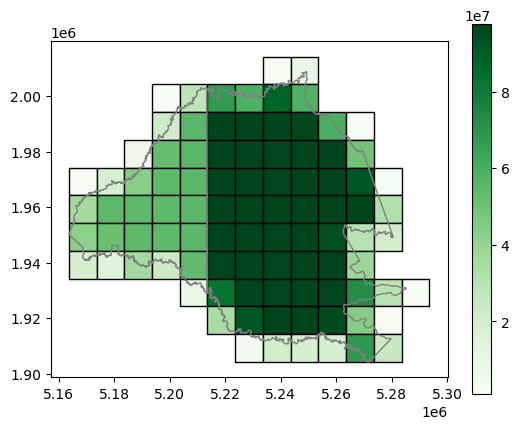

In [800]:
base = grid.plot(
    column='bosques', 
    edgecolor='black',
    legend=True, 
    cmap='Greens'
);
municipios_con_bosque.plot(ax=base, color='none', edgecolor='grey', legend=True)

##### 3. Compare the sum of the original attribute (e.g., population) in the project layer with the sum in the grid.

In [748]:
municipios_con_bosque['area_bosque_ha'].sum()

580309.8427646898

In [750]:
grid['bosques'].sum()/10000

580309.842765077

En este caso, la suma del atributo original (bosques) en la capa del proyecto (580309.8427646898) es prácticamente idéntica a la suma calculada en la cuadrícula (580309.842765077). Esto confirma que el procedimiento de interpolación ponderada por área preserva el valor total del atributo extensivo al redistribuirlo de manera proporcional a las áreas de intersección.

La diferencia insignificante entre ambos valores se debe probablemente a errores de redondeo numérico en los cálculos.

###### 1. What are incongruent layers, and how do they differ from congruent layers in spatial analysis?

*Incongruent layers*: Son capas espaciales que no tienen una alineación directa o coincidente en términos de sus límites geométricos. Esto significa que los polígonos, celdas o características de las capas no comparten la misma estructura espacial ni se superponen perfectamente. Un ejemplo es cuando una capa tiene polígonos de municipios y otra tiene una cuadrícula rasterizada.

*Congruent layers*: Son capas espaciales cuyos límites geométricos coinciden perfectamente o están alineados. En estas capas, las entidades espaciales comparten bordes y áreas comunes, lo que facilita la integración y el análisis conjunto.

La diferencia principal radica en que en las capas incongruentes, las entidades espaciales no coinciden, lo que genera desafíos para el análisis y la agregación de datos.

###### 2. Why is it important to address incongruence when aggregating spatial data?

Es crucial abordar la incongruencia en capas espaciales porque:

Preservación de atributos: En el caso de variables extensivas (como los bosques), la suma total debe preservarse después de la agregación o redistribución. Si no se considera la incongruencia, los valores totales pueden no coincidir.

Precisión del análisis: La incongruencia puede introducir errores al interpretar relaciones espaciales entre capas, ya que las áreas no coincidentes pueden dar lugar a datos incorrectos o sesgados.

Validez de los resultados: La falta de alineación espacial puede distorsionar las estadísticas resultantes (por ejemplo, densidades, promedios ponderados) al distribuir o calcular atributos sin considerar las proporciones geométricas reales.

###### 3. How does area-weighted interpolation help resolve issues caused by incongruence between layers?

La interpolación ponderada por área aborda la incongruencia al redistribuir los valores de una capa (por ejemplo, bosques) proporcionalmente al área de intersección con otra capa. Esto se realiza bajo las siguientes suposiciones:

Para variables extensivas (como bosque):

Los valores se distribuyen uniformemente dentro de los polígonos originales.
Las áreas de intersección entre capas reciben un valor proporcional al área del polígono original que cubren.

Para variables intensivas (como densidad de bosques):

Se calculan promedios ponderados basados en las áreas de intersección, preservando el valor medio en lugar de la suma total.
Esto asegura que los datos se ajusten de manera proporcional al espacio representado, resolviendo problemas de desajuste geométrico entre capas incongruentes.

###### 4. What are the limitations of using area-weighted interpolation with incongruent layers?

Aunque la interpolación ponderada por área es útil, tiene algunas limitaciones:

Suposición de uniformidad: La interpolación asume que los valores (como bosques o densidad) están distribuidos uniformemente dentro de cada polígono, lo cual puede no ser realista en áreas heterogéneas.

Errores en áreas pequeñas: Las intersecciones entre capas pueden ser muy pequeñas, lo que genera errores de redondeo o cálculos imprecisos en estas áreas.

Dependencia de la calidad de los datos: La precisión de los resultados depende de la calidad y la resolución de las capas espaciales originales. Capas con geometrías mal definidas o generalizadas pueden distorsionar los resultados.

Complejidad computacional: En capas grandes o con geometrías complejas, el cálculo de las intersecciones y el área ponderada puede ser computacionalmente costoso.

#### 5.2.6. Topological Relations

Perform at least one of the following operations:

##### 1. Find geometries that share a boundary with a specific feature.

###### Solución

Encontrar geometrías de puntos que comparten un borde con una característica específica, en este caso, los municipios. Se leen los archivos shapefile

In [834]:
municipios = gpd.read_file("Data\\Municipios.shp")
points = gpd.read_file("Data\\sample_points.shp")

Crear el gráfico base.

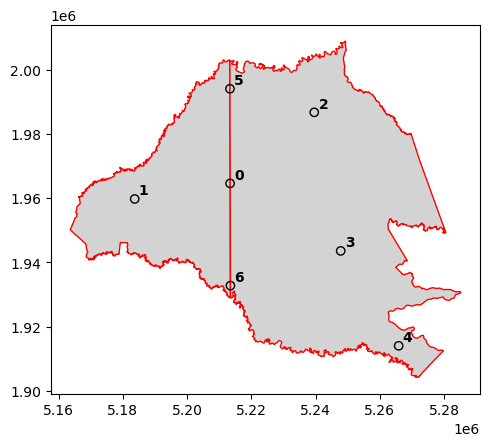

In [835]:
base = municipios.plot(color='lightgrey', edgecolor='red')
#Dibujar los puntos en el mapa
points.plot(ax=base, color='none', edgecolor='black')
# Iterar a través de los puntos y encontrar los que comparten borde con algún municipio
for i, point in enumerate(points.geometry):  # Asegúrate de acceder a la columna de geometrías
    base.annotate(
        i, xy=(point.x, point.y), 
        xytext=(3, 3), textcoords='offset points', weight='bold'
    )

Si el punto toca algún municipio, anotarlo:

In [819]:
points.touches(municipios.geometry.iloc[1])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

##### 2. Find geometries that cross others (e.g., roads crossing rivers).

###### Solución

Encontrar geometrías que crucen otras (por ejemplo, vías que cruzan municipios). 

In [824]:
# Leer los archivos shapefile
municipios = gpd.read_file("Data\\Municipios.shp")
vias = gpd.read_file("Data\\Via.shp")

<Axes: >

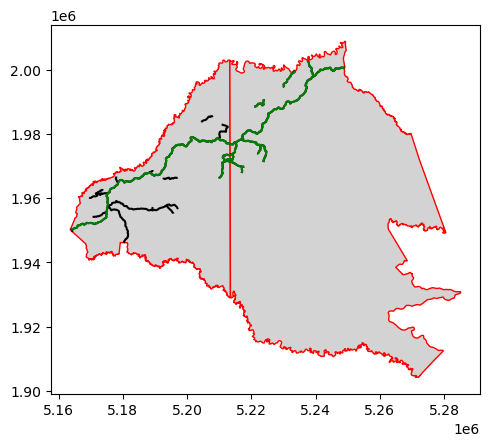

In [826]:
# Crear el gráfico base
base = municipios.plot(color='lightgrey', edgecolor='red')
# Dibujar las vías en el mapa
vias.plot(ax=base, color='black', edgecolor='black')

# Seleccionar las vías que cruzan el municipio en el índice 2
vias_selected = vias[vias.intersects(municipios.geometry.iloc[2])]
# Mostrar las vías seleccionadas en verde
vias_selected.plot(ax=base, color='green', edgecolor='black')

##### 3. Identify overlapping geometries (overlaps).

###### Solución

Se indentifican en el mapa los humedales en gris claro, mientras que aquellos que se superponen con los drenajes se mostrarán en azul claro.

<Axes: >

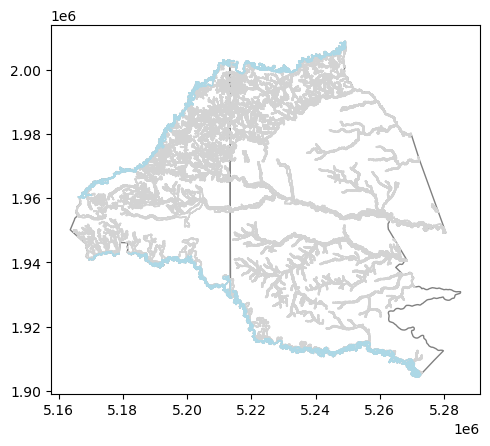

In [833]:
# Leer los archivos shapefile
Drenajes = gpd.read_file("Data\\Drenaje_Doble.shp")
Humedales = gpd.read_file("Data\\Humedales.shp")

# Identificar si los humedales se superponen con los drenajes
Humedales['intersecta_coberturas'] = Humedales.geometry.apply(
    lambda h: Drenajes.geometry.intersects(h).any()
)

# Filtrar solo los humedales que se superponen con los drenajes
humedales_intersectados = Humedales[Humedales['intersecta_coberturas']]

# Graficar los resultados
base = municipios.plot(color='None', edgecolor='gray')
Humedales.plot(ax=base, color='None', edgecolor='lightgray')
humedales_intersectados.plot(ax=base, color='None', edgecolor='lightblue')

##### 4. Use multiple predicates to assign categories. e.g. Classify land parcels as touching, within, or disjoint from protected areas.

C:\Users\Andres Wilches\AppData\Local\Temp\ipykernel_22696\3138711255.py:8: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  Coberturas_touches.plot(ax=base, color='None', edgecolor='lightblue')


<Axes: >

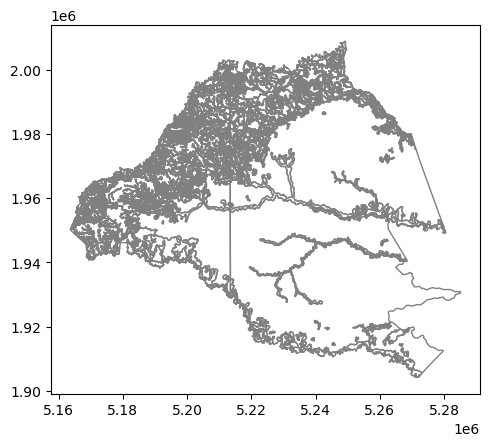

In [851]:
Drenajes = gpd.read_file("Data\\Drenaje_Doble.shp")
Coberturas = gpd.read_file("Data\\Coberturas.shp")

Coberturas_touches = Coberturas[Coberturas.touches(Drenajes.geometry.iloc[2])]

# Graficar los resultados
base = Coberturas.plot(color='None', edgecolor='gray')
Coberturas_touches.plot(ax=base, color='None', edgecolor='lightblue')

<Axes: >

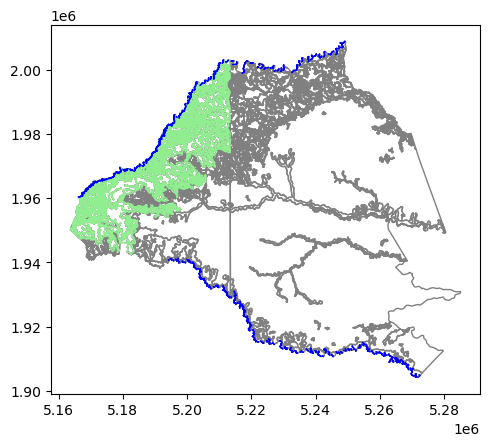

In [863]:
Drenajes = gpd.read_file("Data\\Drenaje_Doble.shp")
Coberturas = gpd.read_file("Data\\Coberturas.shp")

Coberturas_touches = Coberturas[Coberturas.intersects(Drenajes.geometry.iloc[0])]

# Graficar los resultados
base = Coberturas.plot(color='None', edgecolor='gray')
Coberturas_touches.plot(ax=base, color='None', edgecolor='lightgreen')
Drenajes.plot(ax=base, color ='Blue', edgecolor ='blue')

<Axes: >

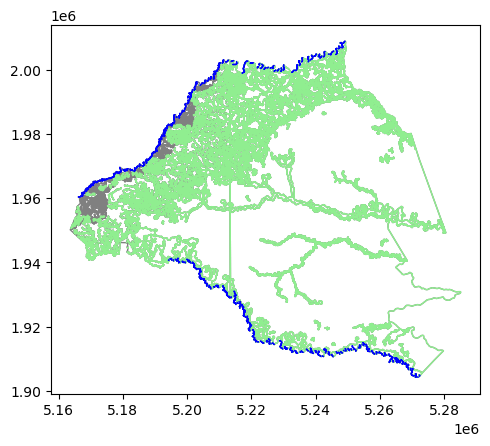

In [865]:
Drenajes = gpd.read_file("Data\\Drenaje_Doble.shp")
Coberturas = gpd.read_file("Data\\Coberturas.shp")

Coberturas_touches = Coberturas[Coberturas.disjoint(Drenajes.geometry.iloc[0])]

# Graficar los resultados
base = Coberturas.plot(color='None', edgecolor='gray')
Coberturas_touches.plot(ax=base, color='None', edgecolor='lightgreen')
Drenajes.plot(ax=base, color ='Blue', edgecolor ='blue')